<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/Muhammad_Haris_Setiawan_Tugas_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identitas**
Muhammad Haris Setiawan - 185150400111012 - PDS B 

# **Deskripsi Tujuan Bisnis**
Setiap Glass atau kaca memiliki karakteristik yang berbeda - beda, hal tersebut dipengaruhi kandungan komposisi penyusun elemen kaca atau glass tersebut. Pada kasus ini akan mengelola dataset terkait banyak nya jumlah variabel penyusun glass atau kaca tersebut. Dataset terkait glass tersebut akan diolah dan dibuatkan modelnya yang sesuai lalu akan ada proses evaluasi terkait model yang dibuat tersebut

# **Analisa Pendekatan yang Dilakukan**
Data diperoleh dari notebook online lalu di donwload dan dimasukan kedalam Github setelah itu menghubungkan google colab dengan github tersebut beserta data nya. Data yang dikelola dalam bentuk .csv atau tabel, lalu data tersebut diolah, dianalisis dan dibuatkan modelnya pada google colab.
Data tersebut berisi informasi macam-macam atau variasi glass atau kaca yang dikelompokkan berdasarkan element penyusun nya

# **Pemahaman terhadap Data yang Dikumpulkan**
Data tersebut berisi informasi macam-macam atau variasi glass atau kaca yang dikelompokkan berdasarkan element penyusun nya. Data tersusun atas 214 baris dan 9 kolom

# **Pengumpulan Data**
Data yang diolah berupa dataset yang diperoleh dari notebook online kaggle.com

# **Eksplorasi Data**

In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # read and wrangle dataframes
import matplotlib.pyplot as plt # visualization
import seaborn as sns # statistical visualizations and aesthetics
from sklearn.base import TransformerMixin # To create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) # preprocessing 
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox # data transform
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin # To create a box-cox transformation class
from collections import Counter
import warnings
# load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/harisse/projectakhirpds/main/glass.csv')
features = df.columns[:-1].tolist()
print(df.shape)

(214, 10)


In [ ]:
df.head(15)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [ ]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

A. Summarize Data dengan deskriptif Statistik


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

B. Data Visualization

1. Univariate Plots - Distribusi berbagai fitur dari kumpulan data ini

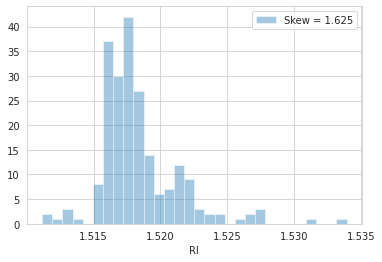

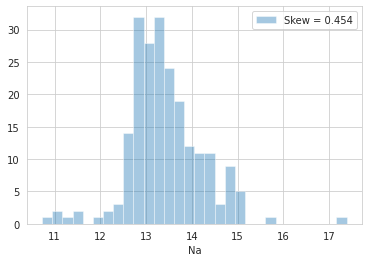

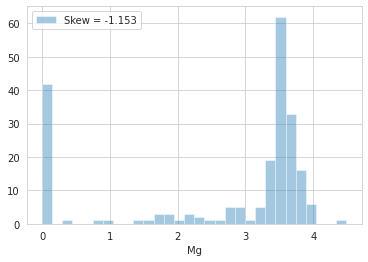

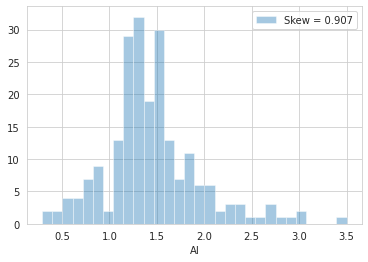

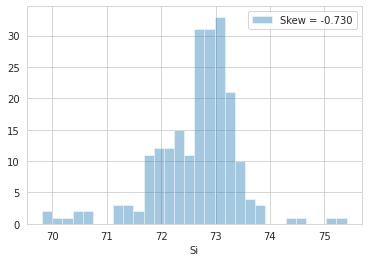

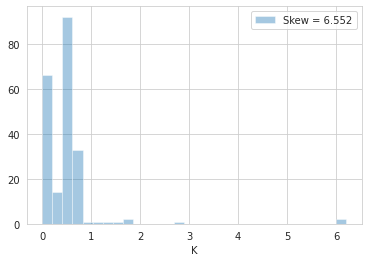

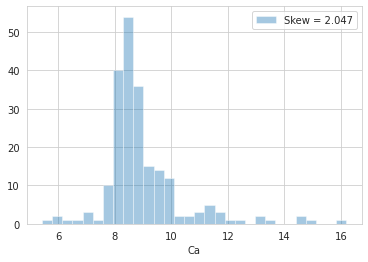

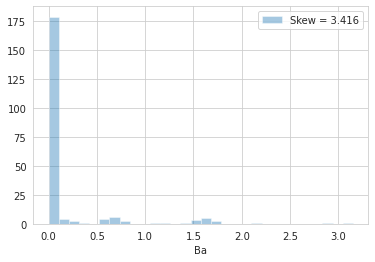

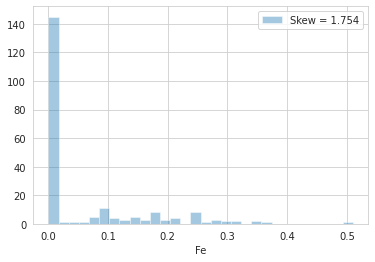

In [ ]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

2. Multivariate Plots - Plot berpasangan untuk memeriksa korelasi antara fitur secara visual

<Figure size 576x576 with 0 Axes>

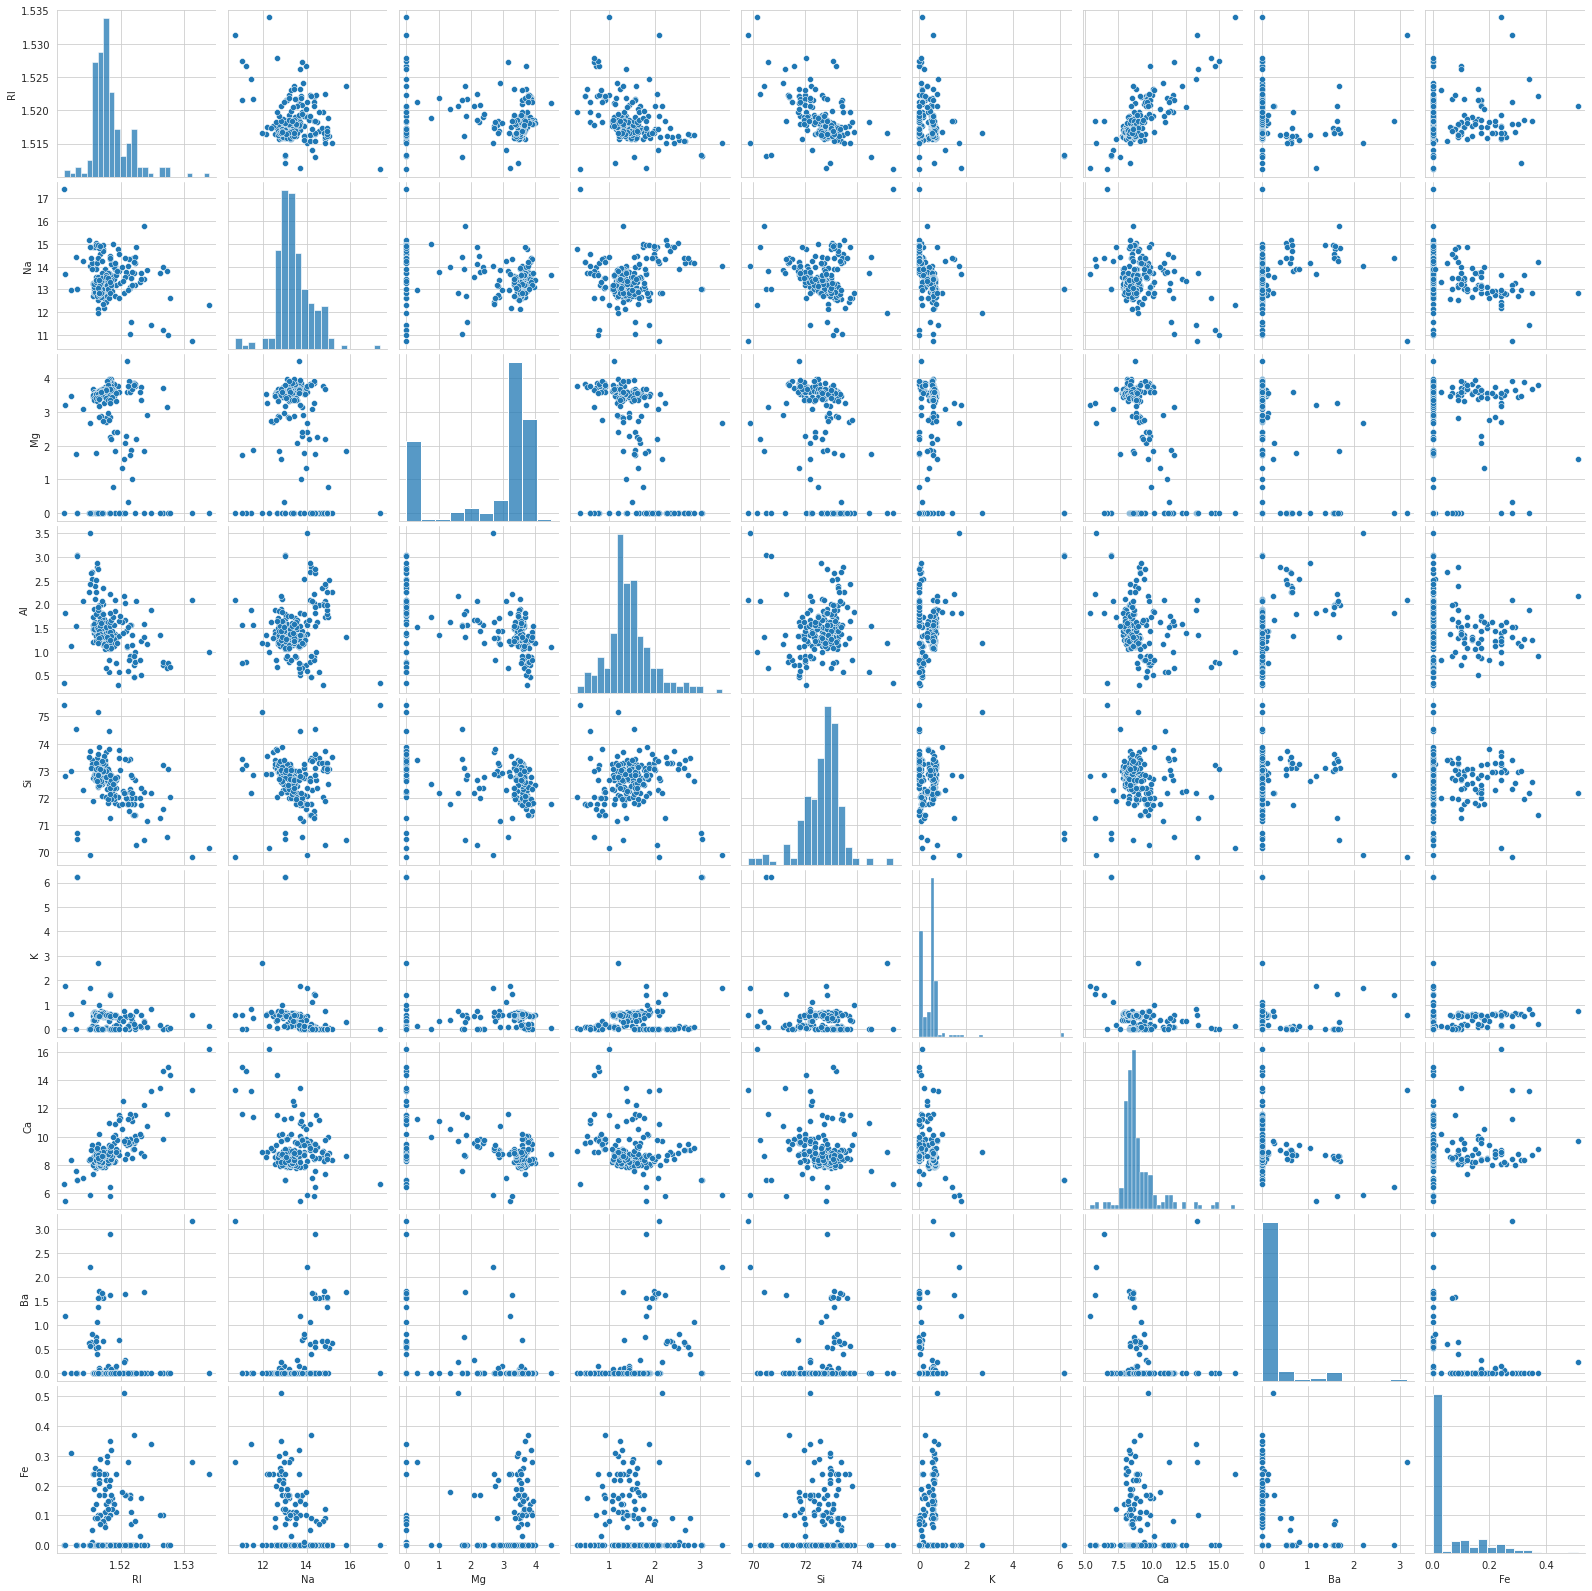

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

3. Peta panas dari korelasi

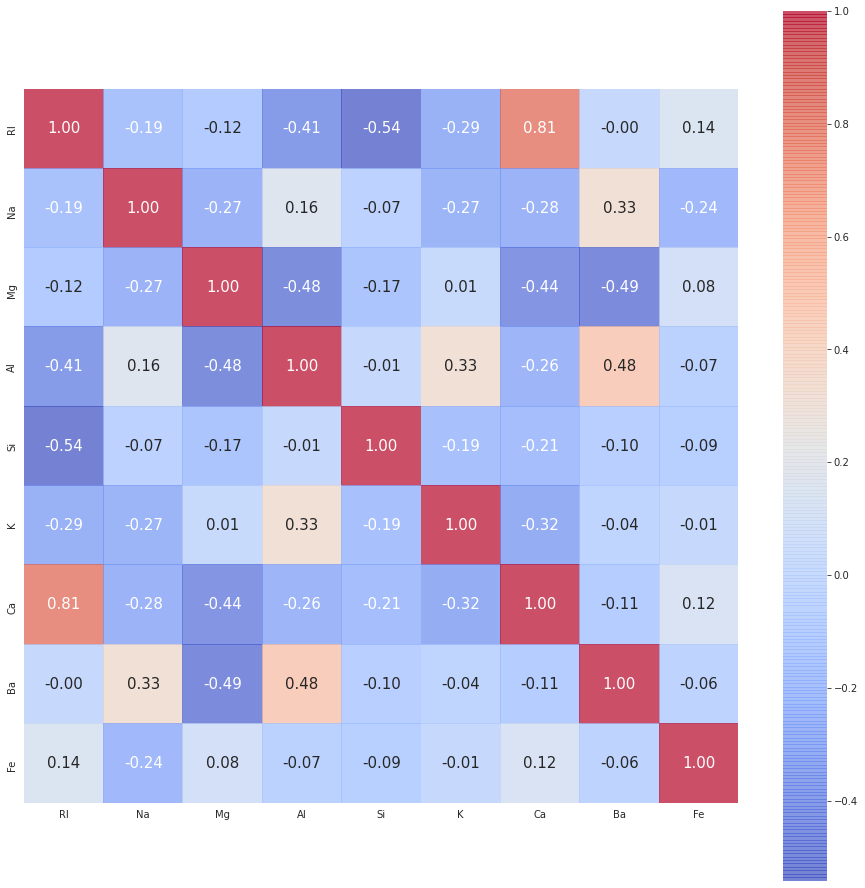

In [ ]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

C. Prepare Data

1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


2. Hunting and removing multiple outliers

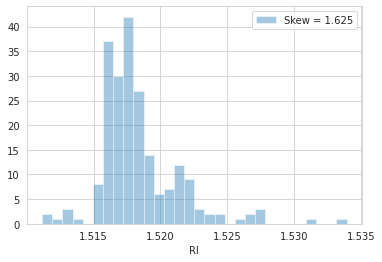

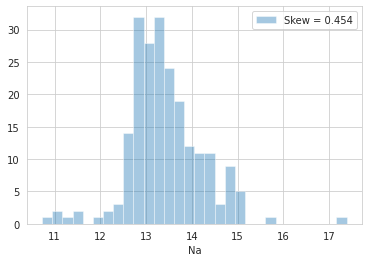

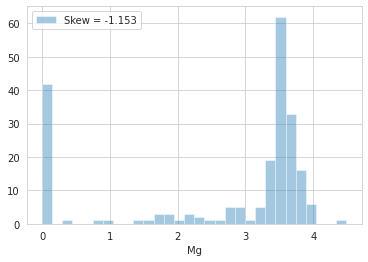

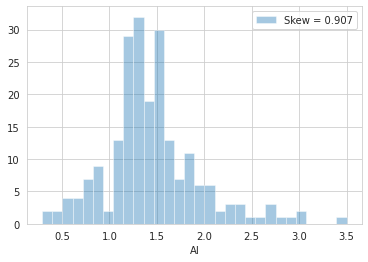

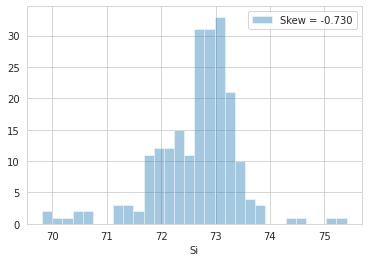

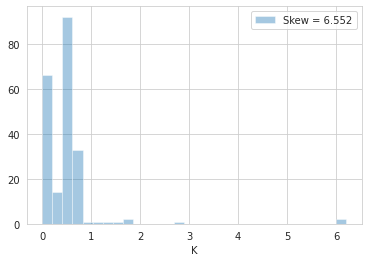

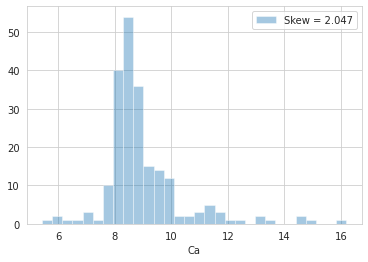

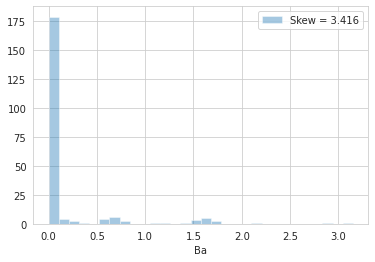

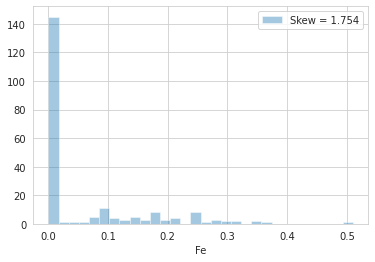

In [ ]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [ ]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

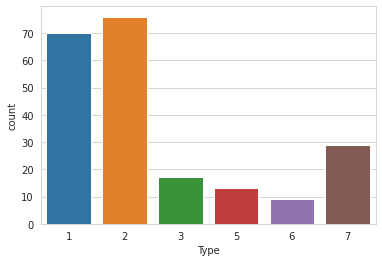

In [ ]:
sns.countplot(df['Type'])
plt.show()

3. Split-out validation dataset

In [ ]:
# Define X as features and y as lablels
X = df[features] 
y = df['Type'] 
# set a seed and a test size for splitting the dataset 
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

4. Data Tranformation

In [ ]:
features_boxcox = []

for feature in features:
    bc_transformed, _ = boxcox(df[feature]+1)  # shift by 1 to avoid computing log of negative values
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)
df_bc = pd.DataFrame(data=features_boxcox, columns=features)
df_bc['Type'] = df['Type']

In [ ]:
df_bc.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,2.140000e+02,214.000000,214.000000,214.000000,2.140000e+02,214.000000,214.000000,214.000000,214.000000,214.000000
mean,8.757099e-04,2.099609,9.485638,0.875325,2.976464e+22,0.278097,0.703271,0.019170,0.018646,2.780374
std,5.433721e-19,0.034261,5.466530,0.200457,3.830370e+21,0.172111,0.005530,0.042242,0.027484,2.103739
min,8.757099e-04,1.973425,0.000000,0.254745,1.797280e+22,0.000000,0.677781,0.000000,0.000000,1.000000
25%,8.757099e-04,2.079212,5.231418,0.784872,2.770766e+22,0.109219,0.700679,0.000000,0.000000,1.000000
50%,8.757099e-04,2.096185,12.350189,0.859826,3.024296e+22,0.358093,0.702500,0.000000,0.000000,2.000000
75%,8.757099e-04,2.118042,13.129628,0.968461,3.181883e+22,0.380233,0.705086,0.000000,0.051278,3.000000
max,8.757099e-04,2.245333,19.718349,1.507653,4.698007e+22,0.870912,0.721187,0.119372,0.067889,7.000000


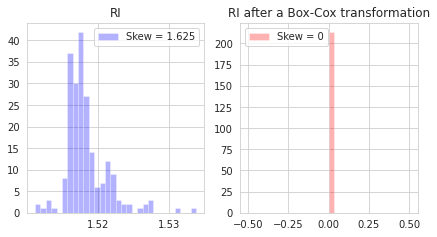

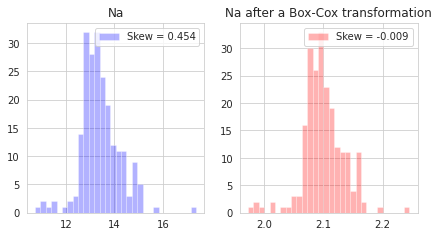

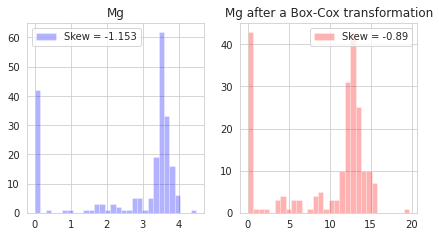

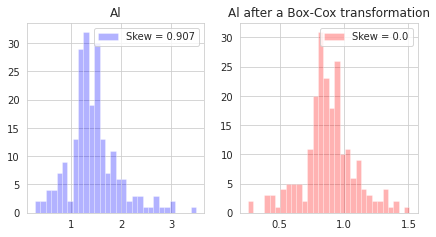

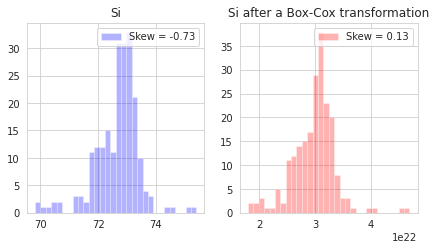

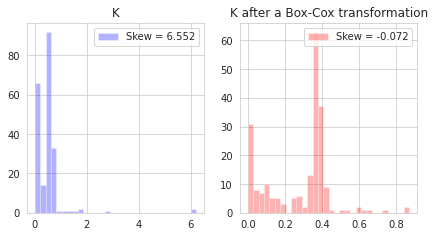

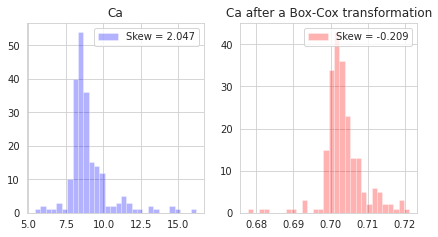

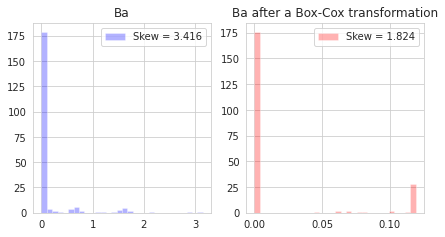

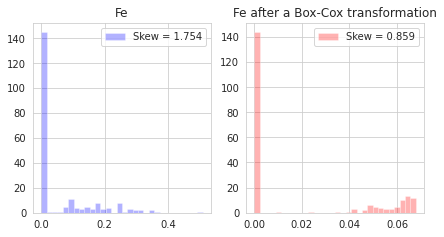

In [ ]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))    
    ax[0].hist(df[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))) )
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    ax[1].hist(df_bc[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' after a Box-Cox transformation')
    ax[1].legend(loc=0)
    plt.show()

In [ ]:
#check if skew is closer to zero after a box-cox transform
for feature in features:
    delta = np.abs( df_bc[feature].skew() / df[feature].skew() )
    if delta < 1.0 :
        print('Feature %s is less skewed after a Box-Cox transform' %(feature))
    else:
        print('Feature %s is more skewed after a Box-Cox transform'  %(feature))

Feature RI is less skewed after a Box-Cox transform
Feature Na is less skewed after a Box-Cox transform
Feature Mg is less skewed after a Box-Cox transform
Feature Al is less skewed after a Box-Cox transform
Feature Si is less skewed after a Box-Cox transform
Feature K is less skewed after a Box-Cox transform
Feature Ca is less skewed after a Box-Cox transform
Feature Ba is less skewed after a Box-Cox transform
Feature Fe is less skewed after a Box-Cox transform


Transformasi Box-Cox tampaknya melakukan pekerjaan yang baik dalam mengurangi kemiringan distribusi fitur yang berbeda. Namun, ini tidak mengarah pada normalisasi distribusi fitur. Trial and error menunjukkan bahwa hal itu tidak mengarah pada peningkatan kinerja algoritma yang digunakan.

Eksploring Dataset

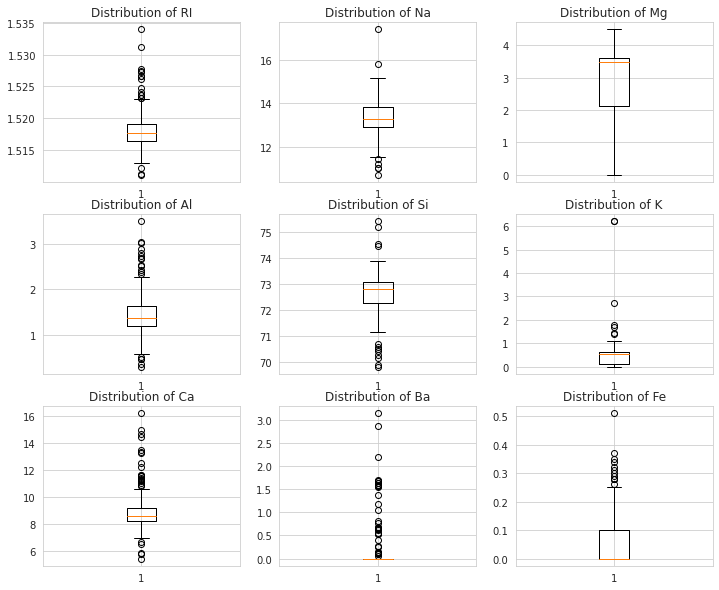

In [ ]:
## Checking each column for outliers
fig = plt.figure(figsize = (12,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)

# Boxplot for RI
ax1.boxplot(df['RI'])
ax1.set_title('Distribution of RI')

# Boxplot for Na
ax2.boxplot(df['Na'])
ax2.set_title('Distribution of Na')

# Boxplot for Mg
ax3.boxplot(df['Mg'])
ax3.set_title('Distribution of Mg')


# Boxplot for AL
ax4.boxplot(df['Al'])
ax4.set_title('Distribution of Al')



# Boxplot for Si
ax5.boxplot(df['Si'])
ax5.set_title('Distribution of Si')


# Boxplot for K
ax6.boxplot(df['K'])
ax6.set_title('Distribution of K')

# Boxplot for Ca
ax7.boxplot(df['Ca'])
ax7.set_title('Distribution of Ca')


# Boxplot for Ba
ax8.boxplot(df['Ba'])
ax8.set_title('Distribution of Ba')


# Boxplot for Fe
ax9.boxplot(df['Fe'])
ax9.set_title('Distribution of Fe');

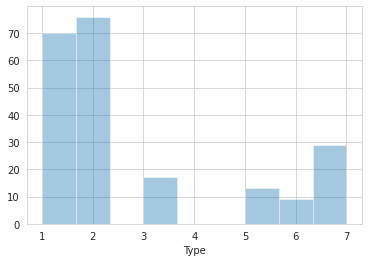

In [ ]:
sns.distplot(df['Type'], kde = False)

In [ ]:
X = df.iloc[:,:-1]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
y = df['Type']
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

Splitting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 50)

#**PEMODELAN DATA**
Pemodelan data dilakukan dengan membuat decision tree

In [ ]:
from sklearn import tree

In [ ]:
classifier_tree = tree.DecisionTreeClassifier()

In [ ]:
classifier_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Visualising Tree

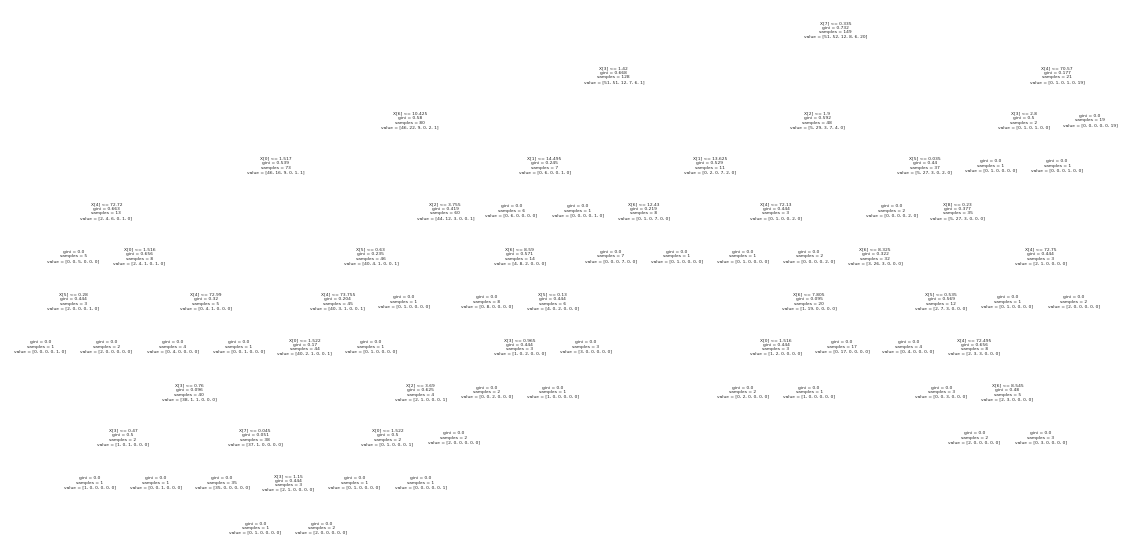

In [ ]:
plt.figure(figsize = (20,10))
tree.plot_tree(classifier_tree);

#**Evaluasi Model**

Membuat prediksi dan mengukur akurasi model

In [ ]:
predict_type = classifier_tree.predict(X_test)

In [ ]:
predict_type

array([1, 7, 2, 1, 1, 1, 2, 3, 7, 1, 2, 2, 2, 2, 2, 1, 6, 7, 2, 2, 2, 2,
       1, 2, 3, 2, 1, 2, 7, 2, 1, 1, 3, 1, 3, 2, 5, 1, 2, 5, 7, 2, 2, 3,
       5, 2, 2, 1, 7, 3, 2, 2, 1, 6, 7, 3, 1, 2, 7, 5, 2, 3, 1, 1, 2])

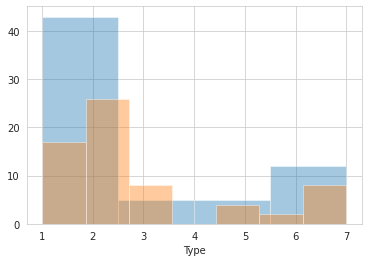

In [ ]:
## Let's plot to see how it's performance
sns.distplot(y_test, kde = False)
sns.distplot(predict_type, kde = False)

In [ ]:
from sklearn.metrics import accuracy_score

Mengukur Akurasi

In [ ]:
accuracy_score(y_test,predict_type)

0.676923076923077

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier_n = KNeighborsClassifier()

In [ ]:
# important to mention that n_neighbors = 5, is not a multiple value of our quantity of features
classifier_n.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Kesimpulan untuk dataset ini, pohon keputusan melakukan pekerjaan yang lebih tinggi dengan memprediksi setiap jenis kaca akan didasarkan pada fitur-fitur ini.